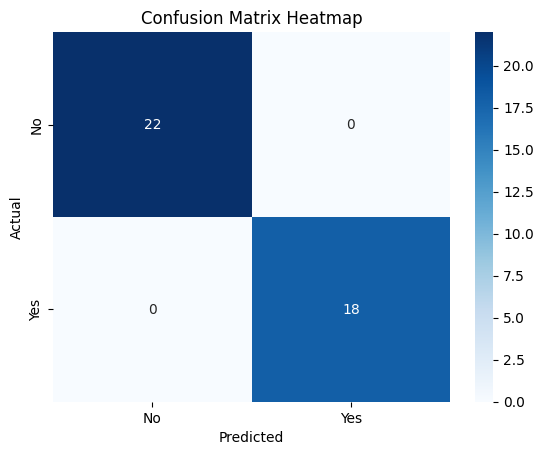

📊 Model Evaluation Metrics:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00

Please answer with 1 (Yes) or 0 (No):
Are you interested in coding? (1/0): 1
Are you interested in music? (1/0): 0
Are you interested in sports? (1/0): 1
Are you available in the evening? (1/0): 1
Are you available on weekends? (1/0): 1

🎓 Prediction for the Student:
 Likely to Join Club!


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Generate Mock Dataset
np.random.seed(42)
n = 200

data = {
    'Interest_Coding': np.random.randint(0, 2, size=n),
    'Interest_Music': np.random.randint(0, 2, size=n),
    'Interest_Sports': np.random.randint(0, 2, size=n),
    'Available_Evening': np.random.randint(0, 2, size=n),
    'Available_Weekend': np.random.randint(0, 2, size=n),
}

df = pd.DataFrame(data)

# Label logic: Join if 3 or more "yes" responses
df['Join_Club'] = (
    df['Interest_Coding'] +
    df['Interest_Music'] +
    df['Interest_Sports'] +
    df['Available_Evening'] +
    df['Available_Weekend']
) > 2

df['Join_Club'] = df['Join_Club'].astype(int)

# 2. Split and Train the Model
X = df.drop(columns=['Join_Club'])
y = df['Join_Club']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 3. Evaluate Model
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

print("📊 Model Evaluation Metrics:")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall   : {recall_score(y_test, y_pred):.2f}")

# 4. Manual User Input via Command Line
def get_user_input():
    print("\nPlease answer with 1 (Yes) or 0 (No):")
    interest_coding = int(input("Are you interested in coding? (1/0): "))
    interest_music = int(input("Are you interested in music? (1/0): "))
    interest_sports = int(input("Are you interested in sports? (1/0): "))
    available_evening = int(input("Are you available in the evening? (1/0): "))
    available_weekend = int(input("Are you available on weekends? (1/0): "))

    return {
        'Interest_Coding': interest_coding,
        'Interest_Music': interest_music,
        'Interest_Sports': interest_sports,
        'Available_Evening': available_evening,
        'Available_Weekend': available_weekend
    }

user_input = get_user_input()
user_df = pd.DataFrame([user_input])

# 5. Make Prediction
prediction = model.predict(user_df)[0]

print("\n🎓 Prediction for the Student:")
print(" Likely to Join Club!" if prediction == 1 else " Not Likely to Join Club.")
